In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.4 MB/s eta 0:00:00


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

#TrOCR-Base-SROIE

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# load image from the IAM dataset
url = "https://2.bp.blogspot.com/-87X6bvUpDg8/UwI8-SsBfCI/AAAAAAAATVQ/CwICM6Zlfe8/s1600/milk+in+fridge.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
generated_text

'Mr.'

# PP OCR

#### Following the inference method here:
https://medium.com/@anhtuan_40207/tutorial-ocr-with-paddleocr-pp-ocr-9a4342e4d7f

#### Model ZOO here:
https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/ppocr_introduction_en.md

In [ ]:
! git clone https://github.com/PaddlePaddle/PaddleOCR.git
# install using the bottom codes
#! python3 -m pip install paddlepaddle-gpu

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46704, done.
remote: Counting objects: 100% (555/555), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 46704 (delta 303), reused 348 (delta 169), pack-reused 46149
Receiving objects: 100% (46704/46704), 343.04 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (32723/32723), done.
Updating files: 100% (1621/1621), done.


In [ ]:
## paddlepaddle-gpu version is important

! pip install paddlepaddle-gpu==2.4.1 -i https://pypi.tuna.tsinghua.edu.cn/simple
! pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
! pip install paddlepaddle-gpu==2.4.1.post116 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.3/585.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which i

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: paddlepaddle-gpu
    Found existing installation: paddlepaddle-gpu 2.4.1
    Uninstalling paddlepaddle-gpu-2.4.1:
      Successfully uninstalled paddlepaddle-gpu-2.4.1
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.4/567.4 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: paddlepaddle-gpu
    Found existing installation: paddlepaddle-gpu 2.4.1.post112
    Uninstalling paddlepaddle-gpu-2.4.1.post112:
      Successfully uninstalled paddlepaddle-gpu-2.4.1.post112


In [ ]:
#Step 4- Mount Google Drive.
# -r command; means recursively

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import re
import shutil
import glob


def save_model(file, source = '/content/PaddleOCR/tools/', dest = '/content/gdrive/My Drive/Datasets/PPOCR/', inference = 'inference'):
    # source = source.replace('\\', '/')
    # dest = dest.replace('\\', '/')
    dir = os.path.join(source, inference, file)
    print(dir)
    if not os.path.exists(dir):
            os.makedirs(dir)

    #files = os.listdir(dest)
    for f in os.listdir(dest):
        path = os.path.join(dest, f)
        if re.search(file, f):
            new_fol = os.path.join(dir, f)
            if not os.path.exists(new_fol):
              os.makedirs(new_fol)
            files = os.listdir(path)
            for fname in files:
              shutil.copy2(os.path.join(path,fname), dir)
            #shutil.copytree(path, new_fol)
    os.listdir(dir)



In [ ]:
models = ['det', 'rec', 'cls']

for model in models:
  save_model(file = model)

/content/PaddleOCR/tools/inference/det
/content/PaddleOCR/tools/inference/rec
/content/PaddleOCR/tools/inference/cls


In [ ]:
os.chdir('/content/PaddleOCR/')
! pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.3/231.3 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.5 MB/s eta 0:00:00
  Created wheel for lan

In [ ]:
## save images under doc/imgs_en/

import requests
import datetime
from datetime import date

def download_image(urls, dest = 'doc/imgs_en/'):
    today = str(datetime.datetime.now())
    final_paths = []
    for url in urls:
      img_data = requests.get(url).content
      dest_path = os.path.join(dest, '_'.join(["fridge_image",today,".jpg"])) # for other image types?
      # https://www.geeksforgeeks.org/convert-an-image-into-jpg-format-using-pillow-in-python/
      with open(dest_path, 'wb') as handler:
        handler.write(img_data)
        final_paths.append(dest_path)
    return final_paths

In [ ]:
# make sure urls are placed in list []
os.chdir('/content/PaddleOCR/')
image_paths = download_image([r"https://2.bp.blogspot.com/-87X6bvUpDg8/UwI8-SsBfCI/AAAAAAAATVQ/CwICM6Zlfe8/s1600/milk+in+fridge.jpg"])

In [ ]:
#image_paths

In [ ]:
for image in image_paths:
  image = str(image)
  print(str(image))

doc/imgs_en/fridge_image_2023-07-18 12:15:10.363694_.jpg


In [ ]:
os.path.exists(image)

True

In [ ]:
# older version - use updated script as below cell

#os.chdir('/content/PaddleOCR/')

# for image in image_paths:
# # update --image_dir to newly uploaded images using new functions above
#   img = str(image)
#! python3 tools/infer/predict_system.py --image_dir='doc/imgs_en/fridge_image_2023-06-19 07:28:15.305254_.jpg' --det_model_dir="tools/inference/det/" --cls_model_dir="tools/inference/cls/" --rec_model_dir="tools/inference/rec/"  --rec_char_dict_path="ppocr/utils/en_dict.txt"

Upload rewrite_predict_system.py under tools/infer/

In [ ]:
# trying rewritten predict_system.py (rewrite_predict_system.py)
os.chdir('/content/PaddleOCR/')
! python3 tools/infer/rewrite_predict_system2.py --image_dir="doc/imgs_en/" --det_model_dir="tools/inference/det/" --cls_model_dir="tools/inference/cls/" --rec_model_dir="tools/inference/rec/"  --rec_char_dict_path="ppocr/utils/en_dict.txt"

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr

#### Output results

[2023/06/19 01:54:14] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2023/06/19 01:54:16] ppocr DEBUG: dt_boxes num : 19, elapse : 1.8512630462646484
[2023/06/19 01:54:16] ppocr DEBUG: rec_res num  : 19, elapse : 0.06919312477111816
[2023/06/19 01:54:16] ppocr DEBUG: 0  Predict time of doc/imgs_en/milk.jpg: 1.935s
[2023/06/19 01:54:16] ppocr DEBUG: NADERJOE'S, 0.868
[2023/06/19 01:54:16] ppocr DEBUG: RICE, 0.994
[2023/06/19 01:54:16] ppocr DEBUG: DRINK, 0.998
[2023/06/19 01:54:16] ppocr DEBUG: NON-DAIRY BEVERAGE, 0.974
[2023/06/19 01:54:16] ppocr DEBUG: ORGANIC, 0.996
[2023/06/19 01:54:16] ppocr DEBUG: MILD SALSA, 0.928
[2023/06/19 01:54:16] ppocr DEBUG: AADE WITH AGAVEN, 0.918
[2023/06/19 01:54:16] ppocr DEBUG: Unsweetened, 0.998
[2023/06/19 01:54:16] ppocr DEBUG: ORIGINAL, 0.996
[2023/06/19 01:54:16] ppocr DEBUG: USDA, 0.996
[2023/06/19 01:54:16] ppocr DEBUG: Enriched, 0.998
[2023/06/19 01:54:16] ppocr DEBUG: Vitamins A,D,B& Calcium, 0.899
[2023/06/19 01:54:16] ppocr DEBUG: gV, 0.850
[2023/06/19 01:54:16] ppocr DEBUG: Gluten Free, 0.975
[2023/06/19 01:54:16] ppocr DEBUG: PAREVE, 0.983
[2023/06/19 01:54:16] ppocr DEBUG: NET 64 FL OZ(1/2 GAL)1.89 L, 0.830
[2023/06/19 01:54:16] ppocr DEBUG: Ashley's Green Life, 0.938
[2023/06/19 01:54:17] ppocr DEBUG: The visualized image saved in ./inference_results/milk.jpg
[2023/06/19 01:54:17] ppocr INFO: The predict total time is 2.5697860717773438




Text Detection/Classification/Reconition Results with PaddlePadddleOCR



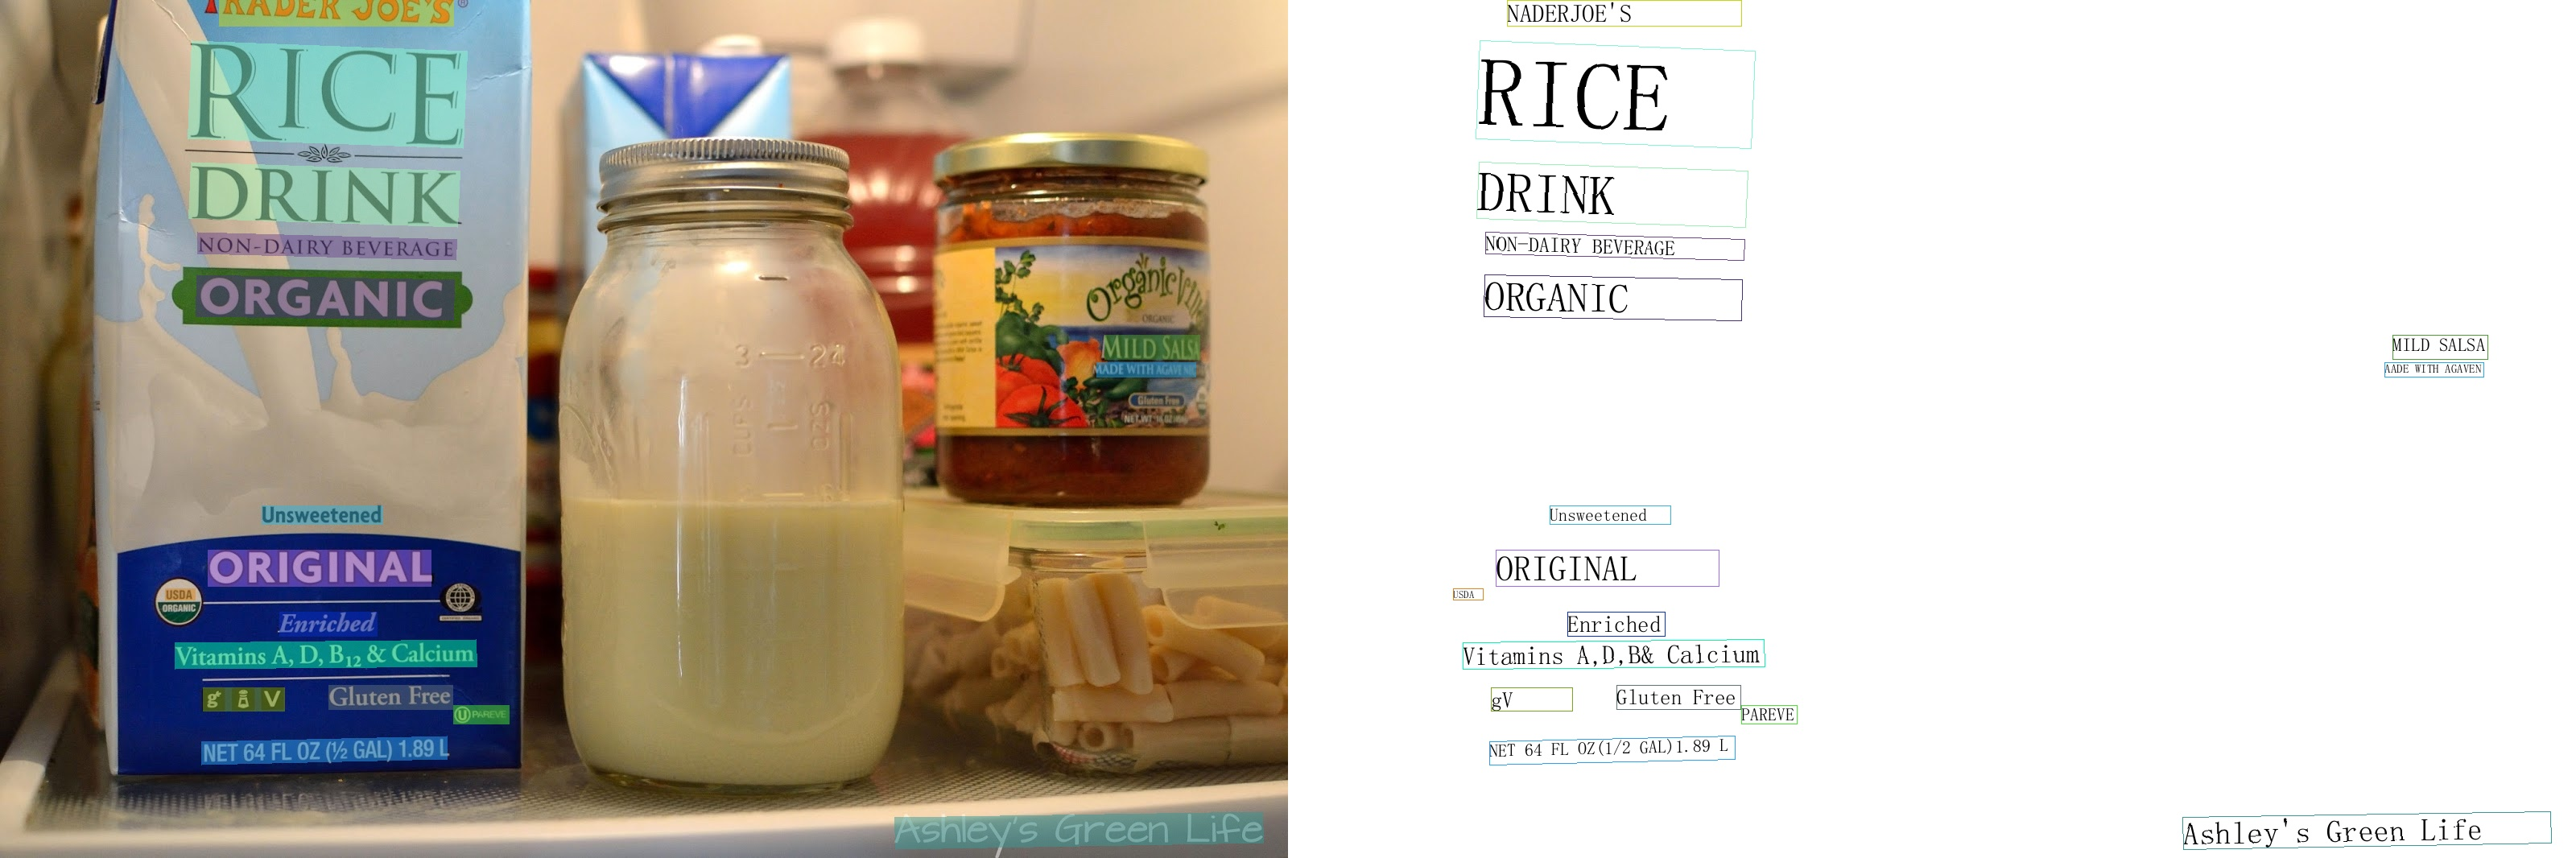

#### output only text results

Issues & challenges

- order of predictions are not matched with the locations of objects
- add bounding boxes to prediction results (rec_res)

- improve the codes to predict following the order of the texts (left to right, top to botoom) [rewrite_predict_system.py]

Solution
- object detection -> identify locations of objects (e.g. bottoles /packages)
- text detection/recognition -> locate the loations of objects using bounding bozes

What has to happen?

- identify matching/closest bounding boxes from object dection models e.g. [(min(xmin2 - xmin1)) for xmin2 - xmin1]
- if the prediction was too generic, use the text recognition models

### To do

- add bounding boxes to the results
- explore min results


- explore receipt scanning quality


- add barcode scanning models

### Google Vision API

In [ ]:
! pip install fastapi
! pip install google-cloud-vision
! pip install uvicorn

In [ ]:
from fastapi import FastAPI
from google.cloud import vision

def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print("Texts:")

    for text in texts:
        print(f'\n"{text.description}"')

        vertices = [
            f"({vertex.x},{vertex.y})" for vertex in text.bounding_poly.vertices
        ]

        print("bounds: {}".format(",".join(vertices)))

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

In [ ]:
detect_text_uri("https://2.bp.blogspot.com/-87X6bvUpDg8/UwI8-SsBfCI/AAAAAAAATVQ/CwICM6Zlfe8/s1600/milk+in+fridge.jpg")

### filter the results to show specific wordings/items
### exclude specific words: "persons", "bottle"